In [43]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

epsilon_0 = 8.854187 * 10**-12
k = 1 / (4 * np.pi *epsilon_0)

#Class which each point charge we use in calculation is an istance of
class point_charge:
    '''
    Simple class that represents our point charges, storing an x and y value for each as well as an amount of charge
    '''
    def __init__(self, coordinates, charge):
        '''
        Input: 
        Coordinates- Coordinates in (x, y) form; tuple
        Charge- Amount of charge that the point charge carries; float
        '''
        #This is a special function that happens when we declare a new point charge object, nothing special,
        #it basically says that the coordinates and charge we specified when initializing the object are the objects coords and charge_val
        self.coords = coordinates
        self.charge_val = charge

#Function to define the 'squiggle r' for a given charge and point, this is the distance between charge and point
def get_r_vec(charge, point):
    '''
    Input:
    charge- The point charge object that we are observing; point charge object
    point- The field point coordinates in (x,y) form; list
    
    Output:
    Returns a list of coordinates in form [x,y]; list
    
    Desc:
    Takes in a point charge and a field point, and finds the distance between them (affectionately known as squiggle r).
    '''
    return [point[0] - charge.coords[0], point[1] - charge.coords[1]]

#Function to get the magnitude of any vector
def get_magnitude(vector):
    '''
    Input:
    vector- A list/vector of which the magnitude is desired; list
    
    Output:
    Numpy float of the magnitude of the vector; numpy float
    
    Desc:
    Takes in a vector, and returns the scalar magnitude of given vector
    '''
    magnitude = 0
    for var in vector:
        magnitude += var**2
    return np.sqrt(magnitude)

#Function used to calculate the Electric field at a given point generated by a given list of charges
def get_e_field(point, charges):
    '''
    Input:
    point- The field point coordinates at which we will calculate the electric field caused by the point charges; list or tuple
    charges- The list of charges which will contribute to the electric field; list of point charge objects
    
    Output:
    returns a two element list/vector, the x and y components of the electric field in form [x, y]
    
    Desc:
    Calculates the elctric field at the given field point that is generated by the given point charges
    '''
    #Initialize the value we will be adding to
    field_at_point = [0, 0]
    #Repeat steps for each charge
    for charge in charges:
        #Vector math using the functions we made
        squiggle = get_r_vec(charge, point)
        dist = get_magnitude(squiggle)
        unit_vec = squiggle/dist
        
        contribution = (charge.charge_val / dist**2) * unit_vec
        field_at_point += contribution
    field_at_point = field_at_point * k
    return field_at_point

#Function used to generate a list of charges distributed randomly along the unit circle. N charges are generated.
def charge_arrange(charge_total, num_of_charges, plot = "null", graphing = False):
    '''
    Input:
    charge_total- The total amount of charge, the sum of all point charge's charge; float
    num_of_charges- The number of discrete charges that to generate, can be float but will be cast to int; int or float
    plot- Optional input, the axis of which to plot the point charges upon. Only called if the optional input graphing is True; string
    graphing- Optional input, determines whether to represent the points graphically or not; boolean
    
    '''
    charges = []
    num_of_charges = int(num_of_charges)
    for i in range(num_of_charges):
        angle = np.random.randint(0, 359)
        y = np.sin(angle)
        x = np.cos(angle)
        charge_per = (charge_total) / float(num_of_charges)
        charge = point_charge((x, y), charge_per)
        charges.append(charge)
        if(graphing == True):
            plot.plot(x, y, 'ro')
    return charges

#Function to collect the electric field data at a given point for a list of n discrete charges
#Default charge is one micro coloumb
def collect_field_data(field_point, n_charges_list, charge_total = 0.000001):
    '''
    Input:
    field_point- The coordinates of the field point being observed, in form (x,y); tuple or list
    n_charges_list- A list of all amounts of point charges to test, will give the number of charges to generate to charge_arrange(); list of integers or floats
    charge_total- An optional input, the total charge that will be split among all point charges generated for each calculation; float
    
    Output:
    Returns a list of elements which are the vector representation of the electric field calculated, in the form (xcomponent, ycomponent); list of lists
    
    Desc:
    A function specifically to test the effects of an increasing amount of discrete charges with the same total charge on the electric field calculated at
    a particular point. 
    Takes in a field point, a list of numbers which are the number of charges to generate for each calculation, and the total charge which will be split
    evenly among all charges for each calculation. 
    Important to note that the field point and charge total do not change between calculations, only the position of the charges and number of charges changes. 
    '''
    #Initialize a place to store data
    e_field_data = []
    #For each number of charges in our list of amounts to test, we call the function to calculate e field, while at the same time calling charge
    #arrange to generate n charges. We add that data to our e_field_data each time, and then have our data of e_fields for the list of charge amounts that we 
    #supplied. We can then easily graph our data!
    for n in n_charges_list:
        e_field_data.append(get_e_field(field_point, charge_arrange(charge_total, n)))
    return e_field_data

In [99]:
#Defines the list of n's we will collect data from, where n is a number of discrete charges
#Sneakyness here- linspace creates an array within the given range, then the third number is the amount of steps. 
#I do two linspace seperately as I want more concentrated points where n is small to show how crazy it is there, 
#While having a second linspace for the larger numbers so that it's more spaced out, saving processing power as 
#The large numbers take longer, and also reducing the chance of a crazy outlier for our large n's
n = np.linspace(2, 100, 20)
n = np.append(n, np.linspace(100, 4000, 75))

#This for loop is needed to ensure our numbers are ints, we can't have 0.3 of a charge, the whole point is the
#charges are discrete
num = []
for i in n:
    num.append(int(i))
    
#Calls the main function for data collection and stores data in e_field_data
e_field_data = collect_field_data((2, 0), num)

In [100]:
#Function for extracting column i from multi dimensional array/list
def column(matrix, i):
    return [row[i] for row in matrix]

#Gathering x and y components of our field data
x_data = column(e_field_data, 0)
y_data = column(e_field_data, 1)

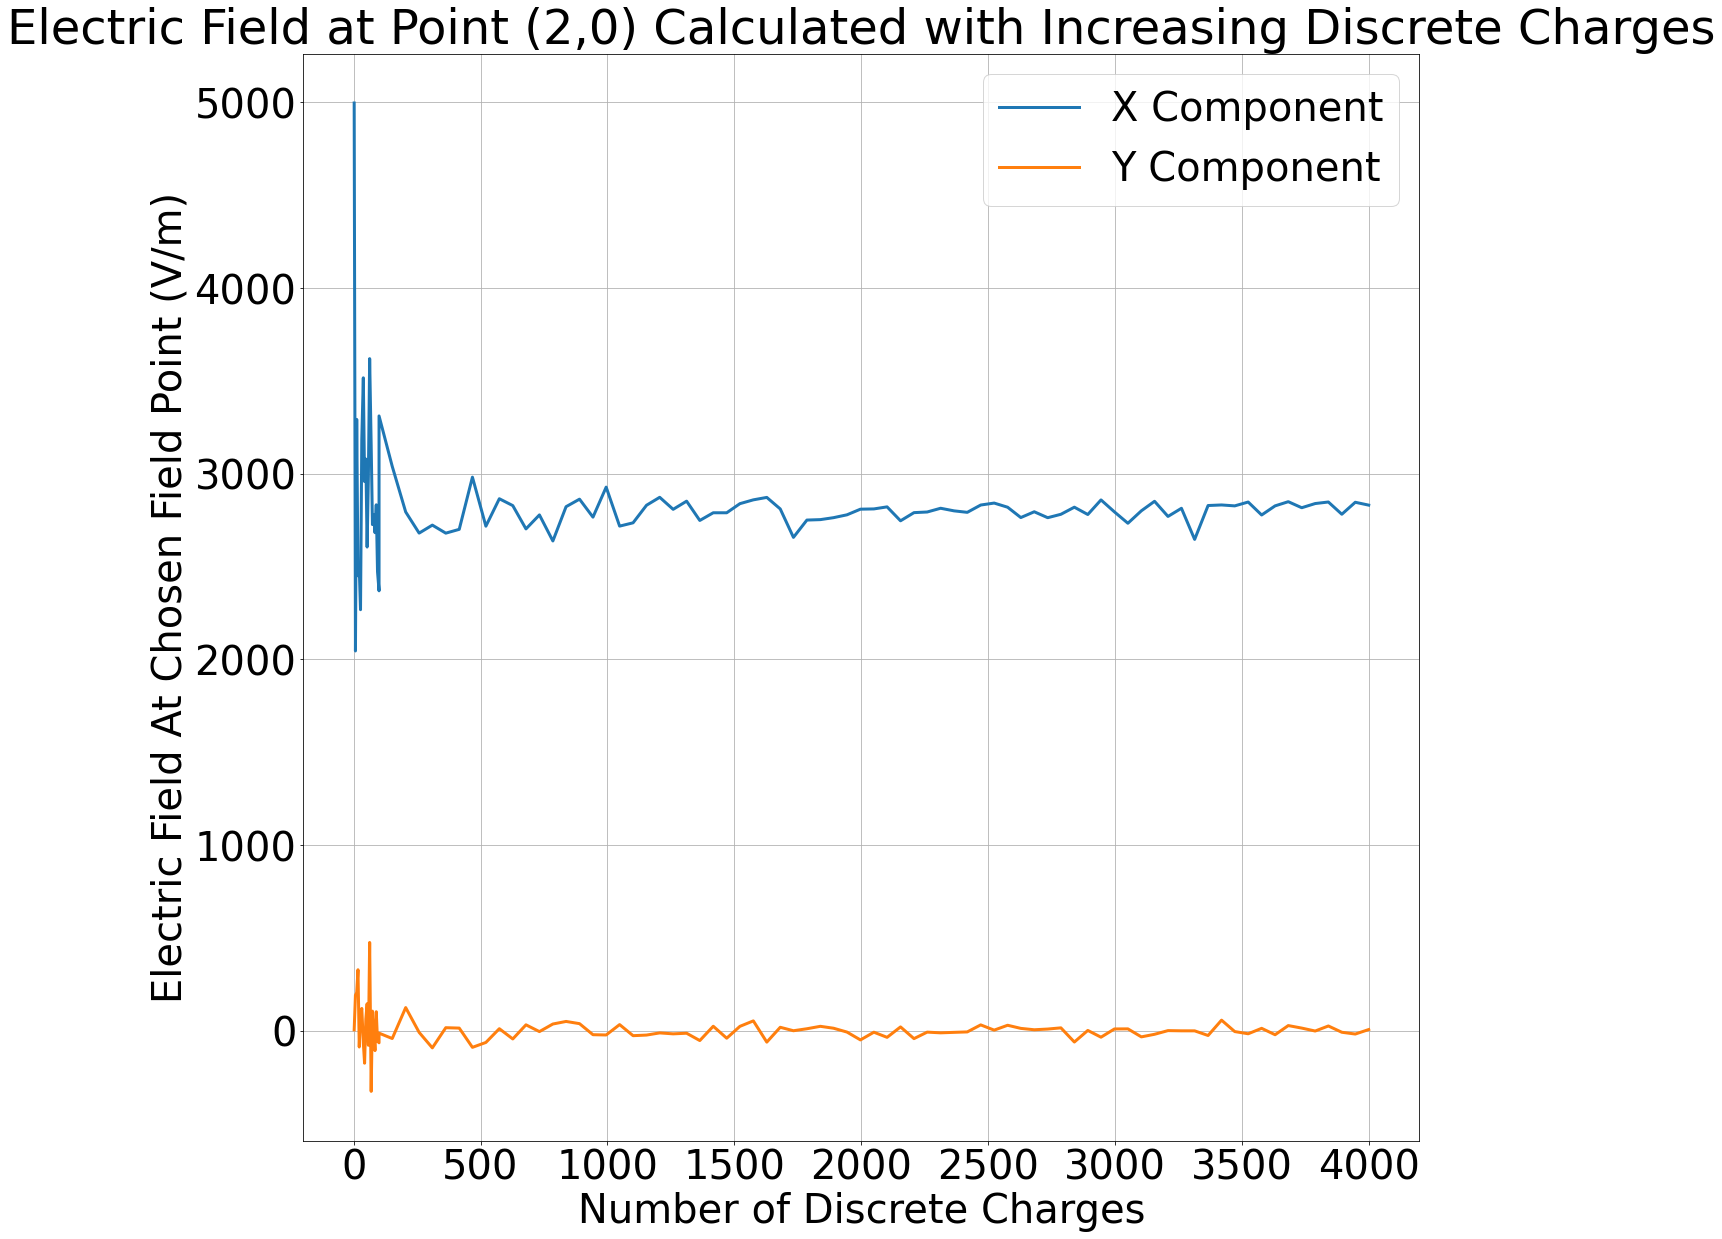

In [102]:
#Setting up our graph using matplotlibrary
fig, ax = plt.subplots(figsize = (20, 20))
#Plotting the data onto the graph
ax.plot(num, x_data, lw = 3, label = "X Component")
ax.plot(num, y_data, lw = 3, label = "Y Component")
#Aesthitic stuff here- .grid() puts the gridlines on, .set() basically let us throw on labels, rcParams.update() is a weird thing we used for the font size
#ax.legend() makes the legend show up, requires us to have the labels that you see when plotting the data
ax.grid()
ax.set(xlabel = 'Number of Discrete Charges', ylabel = "Electric Field At Chosen Field Point (V/m)", title = 'Electric Field at Point (2,0) Calculated with Increasing Discrete Charges')
matplotlib.rcParams.update({'font.size': 40})
ax.legend()

The electric field caused by a ring of continuos charge has a y component of 0 along the x axis. Because of this, I chose to observe the point (2,0), as it should be clear if the calculations using varying amounts of discrete charges have a y component which approaches zero as the number of charges increases. 
Altough the y component never reaches and stays at exactly zero, the calculations from 500 charges and onward seem to hover very close to a component of 0, especially compared to the graphs behavior from the minimum value of 2 charges to around 100 charges. There, the random placement of the charges can lead to massive variations in the electric field's direction, as shown by both the x and y components being unpredictable for those small amounts of discrete charge. 

In [94]:
#Defines the list of n's we will collect data from, where n is a number of discrete charges
n = np.linspace(2, 80, 50)
points = [(-2.82,0), (2,2), (2,-2), (-2,-2), (-2,2), (0,2.82)]
#Calls the main function for data collection and stores data in e_field_data
points_data = []
for point in points:
    curr_point_values = []
    for num in n:
        charges = charge_arrange(0.00001, num)
        curr_point_values.append(get_magnitude(get_e_field(point, charges)))
    points_data.append(curr_point_values)

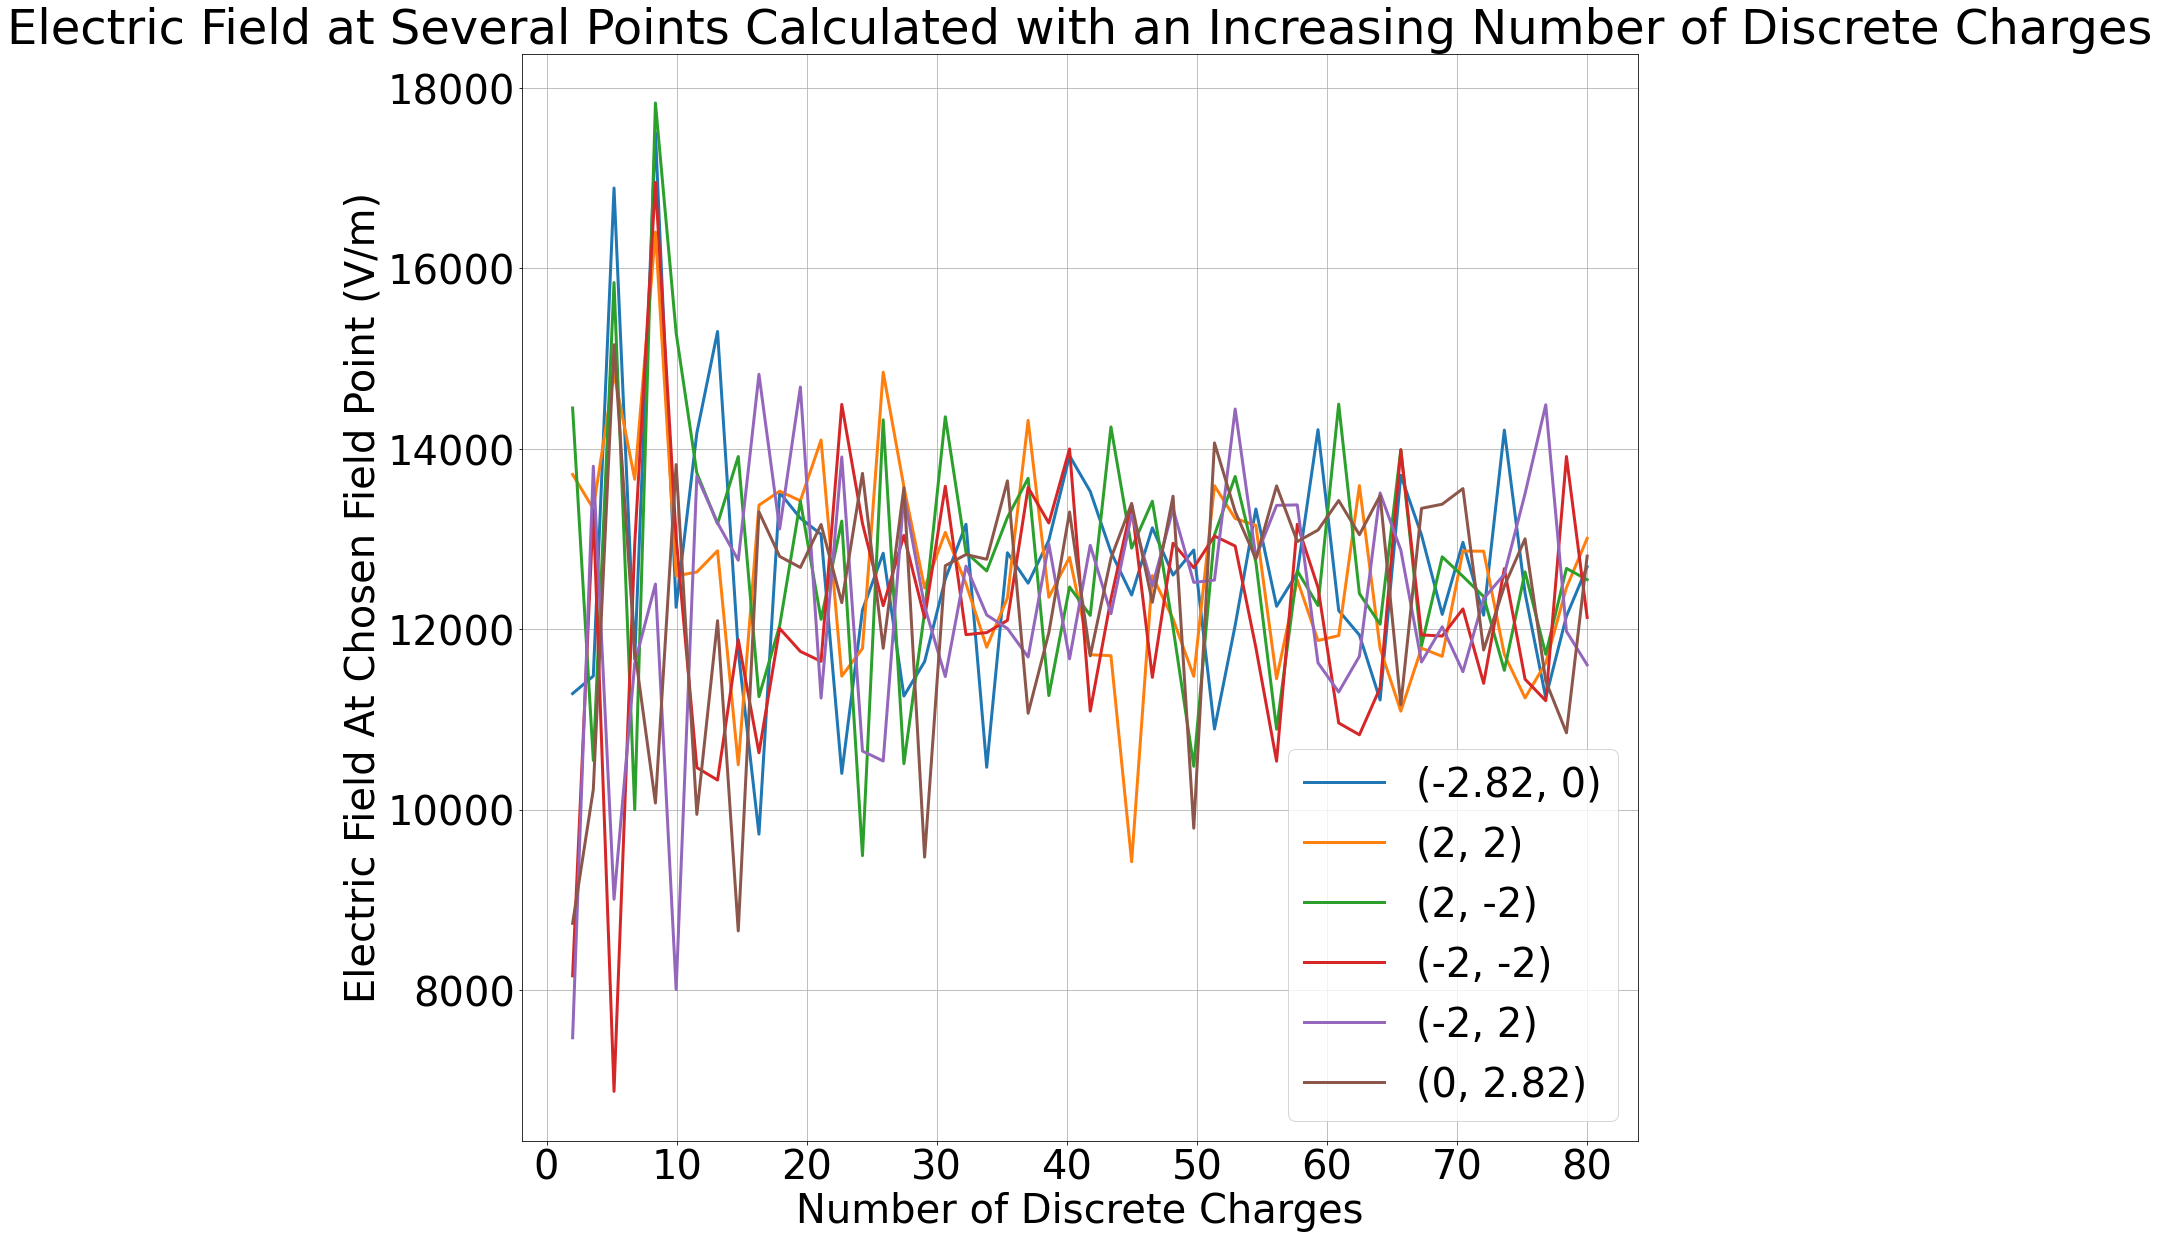

In [95]:
#Setting up our graph using matplotlibrary
fig, ax = plt.subplots(figsize = (20, 20))
labels = []
for point in points:
    labels.append(str(point))
for i in range(len(points)):
    ax.plot(n, points_data[i], lw = 3, label = labels[i])
ax.grid()
ax.set(xlabel = 'Number of Discrete Charges', ylabel = "Electric Field At Chosen Field Point (V/m)", title = 'Electric Field at Several Points Calculated with an Increasing Number of Discrete Charges')
matplotlib.rcParams.update({'font.size': 40})
ax.legend()

For this graph, we are once again observing the electric field for a varying amount of discrete charges, but this time we are observing the magnitude of the field(as opposed to both the x and y component) at multiple points(as opposed to a single point). I selected the field points to observe somewhat arbitrarily, but made sure to include a point along the x axis, as well as one along the y axis. I also made sure to include both positive and negative coordinates to ensure that there is one point in each quadrant. All points were also chosen to be close to the same distance from the unit circle, altough the points along the y and x axis were rounded so they are slightly further than the rest.

21
441


[Text(0.5, 1.0, 'Unit Vectors of an Electric Field Generated by 5 Discrete Charges')]

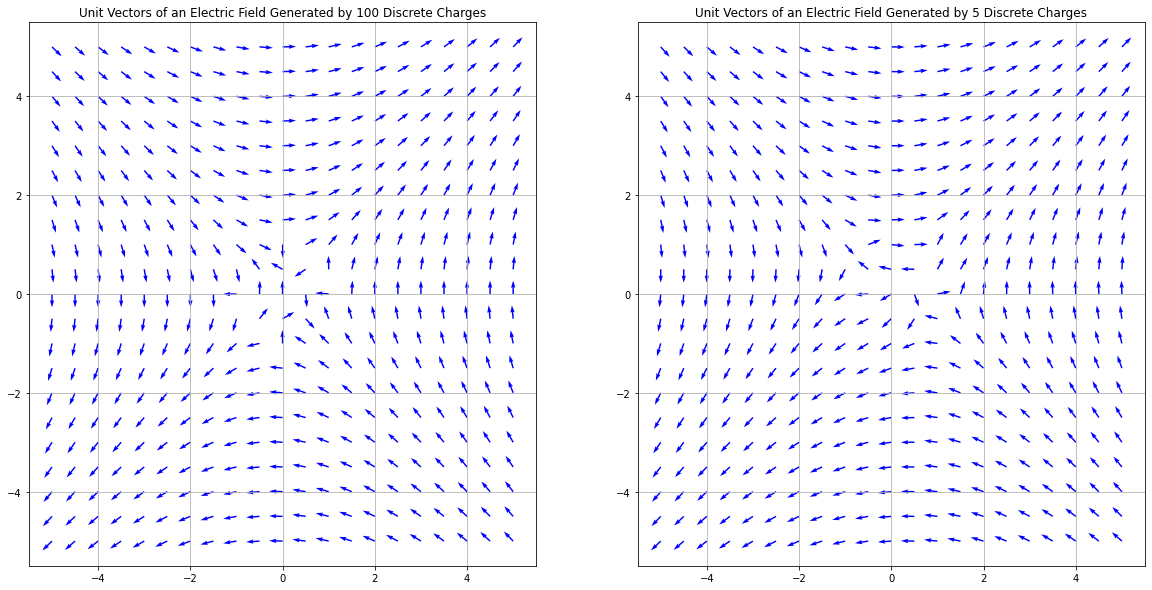

In [98]:
#Setting up graph using matplotlibrary
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 10))
ax1.grid()
#Generate new set of charges to plot graphically, and plot as plot = True
plot1_charges = charge_arrange(1, 100, ax1, True)

#Places to store data to put into our quiver plot
e_field_data_100x = []
e_field_data_100y = []

#Set up our grid to graph and calculate our field at
x = np.linspace(-5, 5, 21)
y = x
xx, yy = np.meshgrid(x, y)

#For loop calculates field at each point of the graph, and also seperates the x and y component
for xpos in x:
    for ypos in y:
        x_val, y_val = get_e_field((xpos, ypos), plot1_charges)
        e_mag = np.sqrt(x_val**2 + y_val**2)
        x_dir = x_val / e_mag
        y_dir = y_val / e_mag
        e_field_data_100x.append(x_dir)
        e_field_data_100y.append(y_dir)
#Quiver Plot for direction of E field
print(len(xx))
print(len(e_field_data_100x))
ax1.quiver(xx, yy, e_field_data_100x, e_field_data_100y, color = 'blue', label = 'Direction of Electric Field')
ax1.set(title = 'Unit Vectors of an Electric Field Generated by 100 Discrete Charges')
#ax1.tricontourf(x, y, field_magnitude_data)
matplotlib.rcParams.update({'font.size': 10})
ax2.grid()
#Generate new set of charges to plot graphically, and plot as plot = True
plot1_charges = charge_arrange(1, 5, ax2, True)

#Places to store data to put into our quiver plot
e_field_data_100x = []
e_field_data_100y = []
#For loop calculates field at each point of the graph, and also seperates the x and y component
for xpos in x:
    for ypos in y:
        x_val, y_val = get_e_field((xpos, ypos), plot1_charges)
        e_mag = np.sqrt(x_val**2 + y_val**2)
        x_dir = x_val / e_mag
        y_dir = y_val / e_mag
        e_field_data_100x.append(x_dir)
        e_field_data_100y.append(y_dir)

#Quiver Plot for direction of E field
ax2.quiver(xx, yy, e_field_data_100x, e_field_data_100y, color = 'blue', label = 'Direction of Electric Field')
ax2.set(title = 'Unit Vectors of an Electric Field Generated by 5 Discrete Charges')
#ax1.tricontourf(x, y, field_magnitude_data)

Unfinished code- The intention was to graphically represent the electric field's direction using unit vectors, but the interpertation is wrong in some strange way. I believe this is because I have yet to find a way to calculate the field direction for each point in the meshgrid used for graphing.